<a href="https://colab.research.google.com/github/pranavdevi28/Rossmann_Sales_Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [132]:
#importing required liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
#importing Rossmann stores dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Rossmann Sales Prediction/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
rm_df.shape

(1017209, 9)

In [136]:
#importing store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Rossmann Sales Prediction/store.csv')

In [137]:
store_df.shape

(1115, 10)

In [152]:
rm_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [139]:
rm_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [140]:
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [141]:
rm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [142]:
#checking for duplicate records
print(f'Total number of duplicate records: {len(rm_df[rm_df.duplicated()])}')

Total number of duplicate records: 0


In [143]:
rm_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see, there are no null value present in the dataset.

Let's convert type for 'Date' column to datetime

In [210]:
#converting date columns to datetime
import datetime as dt
rm_df["Date"] = pd.to_datetime(rm_df["Date"], format="%Y-%m-%d")

In [211]:
#creating separate columns for year and month
rm_df['Year'] = rm_df["Date"].dt.year
rm_df['Month'] = rm_df["Date"].dt.month

In [203]:
#categorical column
rm_df['StateHoliday'].unique()

array(['n', 'a', 'b', 'c'], dtype=object)

In [212]:
#replacing 0 with '0'
rm_df['StateHoliday'] = rm_df['StateHoliday'].replace({0:'n', '0':'n'})

Let's create dummy variable for 'StateHoliday' column

In [213]:
#creating dummy variable for 'StateHoliday' columns
rm_df = pd.get_dummies(data=rm_df, columns=['StateHoliday'])

In [218]:
rm_df.columns

Index(['Store', 'Date', 'Year', 'Month', 'DayOfWeek', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StateHoliday_n', 'Sales'],
      dtype='object')

In [217]:
#rearrangeing the columns for dataframe
column_list = list(rm_df.columns)
index_list =[0,2,8,9,1,4,5,6,7,10,11,12,13,3] #list of new index

new_list = [column_list[i] for i in index_list] #list of new column

rm_df = rm_df.reindex(columns = new_list)

In [219]:
rm_df.head()

,Store,Date,Year,Month,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,StateHoliday_n,Sales
0,1,2015-07-31,2015,7,5,555,1,1,1,0,0,0,1,5263
1,2,2015-07-31,2015,7,5,625,1,1,1,0,0,0,1,6064
2,3,2015-07-31,2015,7,5,821,1,1,1,0,0,0,1,8314
3,4,2015-07-31,2015,7,5,1498,1,1,1,0,0,0,1,13995
4,5,2015-07-31,2015,7,5,559,1,1,1,0,0,0,1,4822


In [177]:
rm_df.groupby(by='Year')['Customers'].sum()

Year
2013    256004425
2014    240488971
2015    147548359
Name: Customers, dtype: int64

In [175]:
rm_df.groupby(by='Year')['Sales'].sum()

Year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

As we can see, number of customers and hence the sales are reducing year over year.

Text(0.5, 1.0, 'Customers vs Sales')

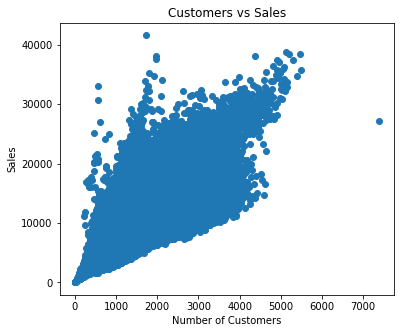

In [193]:
plt.figure(figsize=(6,5))
plt.scatter(x='Customers', y='Sales', data=rm_df)

plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Customers vs Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


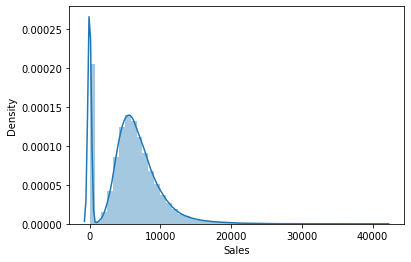

In [ ]:
sns.distplot(rm_df['Sales'])

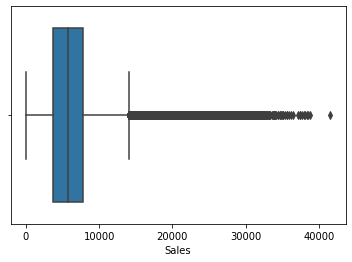

In [ ]:
sns.boxplot(data=rm_df, x='Sales' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


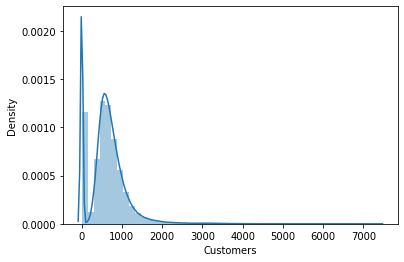

In [ ]:
sns.distplot(rm_df['Customers'] )

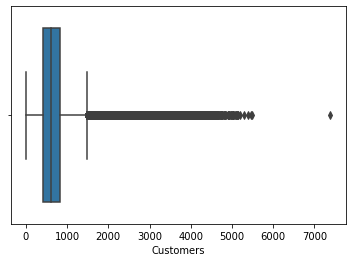

In [ ]:
sns.boxplot(data=rm_df, x='Customers' )

Finding out the correlation between the features

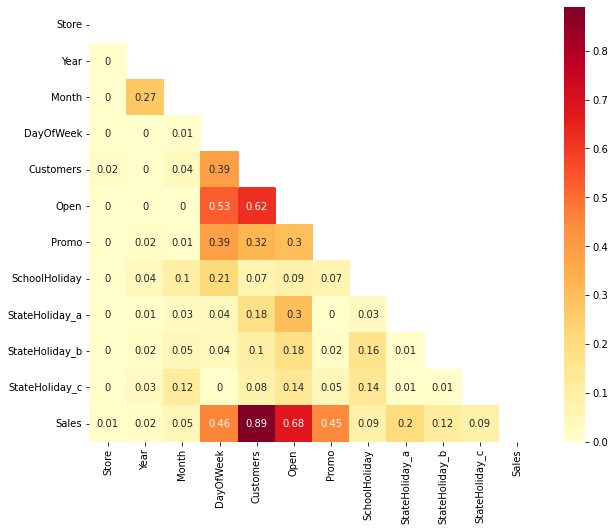

In [194]:
corr = rm_df.corr()

#creating heatmap
plt.figure(figsize=(10,8))
sns.heatmap(round(abs(corr),2), annot=True, cmap='YlOrRd', mask=np.triu(corr))
